# Exercício Programa 01

## Cálculo Numérico com Aplicações em Física

EP apresentado ao curso de Cálculo Numérico (MAP214) ministrado pelo Prof. Dr. Arnaldo Gammal em 2020/2.

### Item a:

In [19]:
# Importamos os módulos que usaremos para este EP
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Definimos a função que queremos resolver numericamente
def func(x):
    return x**3 - np.cos(x)

Para aplicarmos o método da bissecção para encontrar as raízes da função, primeiro, devemos achar em quais intervalos da função existe solução. Faremos isso para intervalos próximo de 0:

In [21]:
# Geramos intervalos entre -10 e 10 de lagura 1
intervals = np.arange(-10, 10, 1)

# Verficamos em qual dele há raízes
intervals_found = []
for i in range(len(intervals) - 1):
    if func(intervals[i]) * func(intervals[i + 1]) < 0:
        intervals_found.append([intervals[i], intervals[i + 1]])

In [22]:
intervals_found

[[0, 1]]

In [23]:
# Aplicamos o método da bissecção nos intervalos encotrados
epsolon = 0.0001
for interval in intervals_found:
    x1 = interval[0]
    x2 = interval[1]
    print('{}\t{}\t{}\t{}\t{}\t{}\t{}'.format('x1', 'x2', 'xm', 'f(x1)', 'f(x2)', 'f(xm)', '|x2-x1|'))
    while np.abs(x2 - x1) > epsolon:
        xm = (x1 + x2) / 2
        print('{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(x1, x2, xm, func(x1), func(x2), func(xm), np.abs(x2- x1)))
        if func(x1) * func(xm) > 0: x1 = xm
        if func(x2) * func(xm) > 0: x2 = xm
    print('Raíz entre: {}'.format([x1, x2]))

x1	x2	xm	f(x1)	f(x2)	f(xm)	|x2-x1|
0	1	0.5	-1.0	0.45969769413186023	-0.7525825618903728	1
0.5	1	0.75	-0.7525825618903728	0.45969769413186023	-0.3098138688738209	0.5
0.75	1	0.875	-0.3098138688738209	0.45969769413186023	0.02892501683667492	0.25
0.75	0.875	0.8125	-0.3098138688738209	0.02892501683667492	-0.1513086090955048	0.125
0.8125	0.875	0.84375	-0.1513086090955048	0.02892501683667492	-0.0639882373592583	0.0625
0.84375	0.875	0.859375	-0.0639882373592583	0.02892501683667492	-0.01824073473747645	0.03125
0.859375	0.875	0.8671875	-0.01824073473747645	0.02892501683667492	0.005163610306846089	0.015625
0.859375	0.8671875	0.86328125	-0.01824073473747645	0.005163610306846089	-0.006583038792791651	0.0078125
0.86328125	0.8671875	0.865234375	-0.006583038792791651	0.005163610306846089	-0.0007208529067607161	0.00390625
0.865234375	0.8671875	0.8662109375	-0.0007208529067607161	0.005163610306846089	0.002218591594685071	0.001953125
0.865234375	0.8662109375	0.86572265625	-0.0007208529067607161	0.0022185

### Item b:

Encontraremos as raízes da função novamente, porém desta vez utilizando o método de Newton-Raphson.

In [24]:
# Definimos analiticamente a derivada função e a adicionamos na forma de uma nova função
def der_func(x):
    return 3 * x**2 + np.sin(x)

In [25]:
# Iteramos pela definição de x no método de Newton-Raphson
x = 0.1
print('{} {} {} {}'.format('n', 'x_n', 'f(x_n)', 'df(x_n)'))
for i in range(10):
    x = x - func(x) / der_func(x)
    print('{} {:.8f} {:.8f} {:.8f}'.format(i+1, x, func(x), der_func(x)))

n x_n f(x_n) df(x_n)
1 7.75599636 466.46785180 181.46164190
2 5.18538228 138.96998777 79.77435948
3 3.44334400 41.78123165 35.27266087
4 2.25882232 12.16015351 16.07933583
5 1.50256263 3.32414655 7.77075635
6 1.07478618 0.76563543 4.34498441
7 0.89857486 0.10281671 3.20475058
8 0.86649227 0.00306643 3.01448892
9 0.86547504 0.00000302 3.00854443
10 0.86547403 0.00000000 3.00853856


### Item c:

In [26]:
# Definimos as constantes que usaremos para montar as funções:
const = 14.4    # eV A
V_0 = 1.09E3   # eV
r_0 = 0.330     # A

In [27]:
# Calculamos o potencial
r = np.arange(0.1, 10, 1E-2)
u = -const/r + V_0*np.exp(-r/r_0)

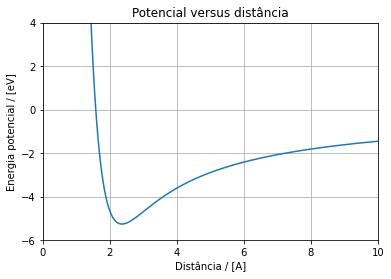

In [28]:
plt.plot(r, u)
plt.title('Potencial versus distância')
plt.xlabel('Distância / [A]')
plt.ylabel('Energia potencial / [eV]')
plt.xlim(0, 10)
plt.ylim(-6, 4)
plt.grid(True)
plt.show()

In [29]:
# Calculamos a força
f = -const/r**2 + V_0*np.exp(-r/r_0)/r_0

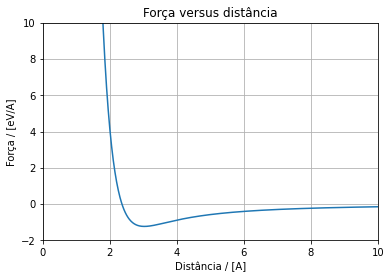

In [30]:
plt.plot(r, f)
plt.title('Força versus distância')
plt.xlabel('Distância / [A]')
plt.ylabel('Força / [eV/A]')
plt.xlim(0, 10)
plt.ylim(-2, 10)
plt.grid(True)
plt.show()

In [14]:
# Definimos a função da força
def f(x):
    return -const/x**2 + V_0*np.exp(-x/r_0)/r_0

In [17]:
# Aplicamos o método das secantes para encontrar o ponto onde a força é nula
'''
    x[0] -> x_n
    x[1] -> x_(n-1)
'''
x = (0.1, 0.2)
print('{} {} {} {} {}'.format('n', 'x_n', 'f(x_n)', 'x_n-1', 'f(x_n-1)'))
for i in range(20):
    x = (x[0] - f(x[0])*(x[0]-x[1])/(f(x[0])-f(x[1])), x[0])
    print('{} {:.14f} {:.14f} {:.14f} {:.14f}'.format(i+1, x[0], f(x[0]), x[1], f(x[1])))

n x_n f(x_n) x_n-1 f(x_n-1)
1 -0.12601420217775 3932.14327263901851 0.10000000000000 999.54127048936357
2 0.17703415691178 1472.18664437512939 -0.12601420217775 3932.14327263901851
3 0.35839660116196 1002.82069134649714 0.17703415691178 1472.18664437512939
4 0.74588531983383 318.70048726858028 0.35839660116196 1002.82069134649714
5 0.92639868972948 182.62376732486189 0.74588531983383 318.70048726858028
6 1.16865931797275 85.15506092295941 0.92639868972948 182.62376732486189
7 1.38031410768778 42.83365885400429 1.16865931797275 85.15506092295941
8 1.59453075964790 20.66569422607774 1.38031410768778 42.83365885400429
9 1.79423045701953 9.90254486726063 1.59453075964790 20.66569422607774
10 1.97796248073068 4.55743550150028 1.79423045701953 9.90254486726063
11 2.13461911585729 1.96434988225805 1.97796248073068 4.55743550150028
12 2.25329180467341 0.74055325650508 2.13461911585729 1.96434988225805
13 2.32510393776122 0.21357081441246 2.25329180467341 0.74055325650508
14 2.35420732816520 0.

Portanto, a distância de equilíbrio é: r_eq = 2.36 A